In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Carregando o CSV com os dados para o dataframe
heart_data = pd.read_csv('heart_disease_data.csv')

In [3]:
# Printando as 5 primeiras linhas do Dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Printando as 5 últimas linhas do Dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Obtém o número de linhas e colunas no conjunto de dados do coração
heart_data.shape

(303, 14)

In [8]:
# Obtendo informações sobre os dados
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Medidas estatísticas sobre os dados
heart_data.describe()
#Contagem (count): O número de entradas não nulas para cada coluna.
#Média (mean): A média aritmética dos valores.
#Desvio Padrão (std): A medida de dispersão dos valores.
#Valor Mínimo (min): O valor mínimo presente na coluna.
#Percentil 25 (25%): O valor abaixo do qual 25% dos dados estão localizados (primeiro quartil).
#Percentil 50 (50%): O valor abaixo do qual 50% dos dados estão localizados (mediana ou segundo quartil).
#Percentil 75 (75%): O valor abaixo do qual 75% dos dados estão localizados (terceiro quartil).
#Valor Máximo (max): O valor máximo presente na coluna.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Verificando a distribuição da Variável Alvo
heart_data['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

# 1 > Defective Heart

# 0 > Healthy Heart

# Separando as Características (Features) e a Variável Alvo (Target)


In [34]:
# Separando as Features (X) e a Variável Alvo (Y)
feature_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[feature_columns]
Y = heart_data['target']

In [14]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Dividindo os Dados em Dados de Treinamento e Dados de Teste


In [16]:
# Dividindo os conjuntos de dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [18]:
# Imprimindo as dimensões das Features antes e depois da divisão
print(X.shape, X_train.shape, X_test.shape)


(303, 13) (242, 13) (61, 13)


# Treinamento do Modelo
# *Modelo: Regressão Logística*


In [19]:
# Criando uma instância do modelo de Regressão Logística
model = LogisticRegression()


In [21]:
# Treinando o modelo de Regressão Logística com os dados de treinamento (X_train, Y_train)
# Isso envolve ajustar o modelo aos padrões e relações nos dados de treinamento
model.fit(X_train, Y_train)
# Agora, o modelo está pronto para fazer previsões com base no que aprendeu durante o treinamento


C:\Users\lukin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Avaliação do Modelo
# *Pontuação de Precisão (Accuracy Score)*


In [23]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Precisão nos dados treinados : ', training_data_accuracy)

Precisão nos dados de treino :  0.8512396694214877


In [27]:
# Precisão nos dados de teste
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [29]:
print('Precisão nos dados de teste : ', test_data_accuracy)

Precisão nos dados de teste :  0.819672131147541


# Construindo um Sistema Preditivo


In [33]:
# Dados de entrada
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Convertendo os dados de entrada para um array numpy
input_data_as_numpy_array = np.asarray(input_data)

# Remodelando o array numpy, pois estamos prevendo apenas uma instância
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Fazendo a previsão com o modelo
prediction = model.predict(input_data_reshaped)
print(prediction)

# Exibindo o resultado da previsão
if prediction[0] == 0:
    print('A pessoa não tem doença cardíaca.')
else:
    print('A pessoa tem doença cardíaca.')


[0]
A pessoa não tem doença cardíaca.


C:\Users\lukin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Idade (62)
Sexo (0)
Tipo de dor no peito (0)
Pressão arterial em repouso (140)
Colesterol sérico (268)
Açúcar no sangue em jejum (0)
Resultado do eletrocardiograma em repouso (0)
Frequência cardíaca máxima atingida (160)
Angina induzida pelo exercício (0)
Depressão do segmento ST induzida pelo exercício (3.6)
Inclinação do segmento ST máximo (0)
Número de vasos principais coloridos por fluoroscopia (2)
Resultado (2)

In [37]:
pip install seaborn matplotlib

                                              0.0/294.6 kB ? eta -:--:--
     ------------                            92.2/294.6 kB 2.6 MB/s eta 0:00:01
     ---------------------------------      256.0/294.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\lukin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

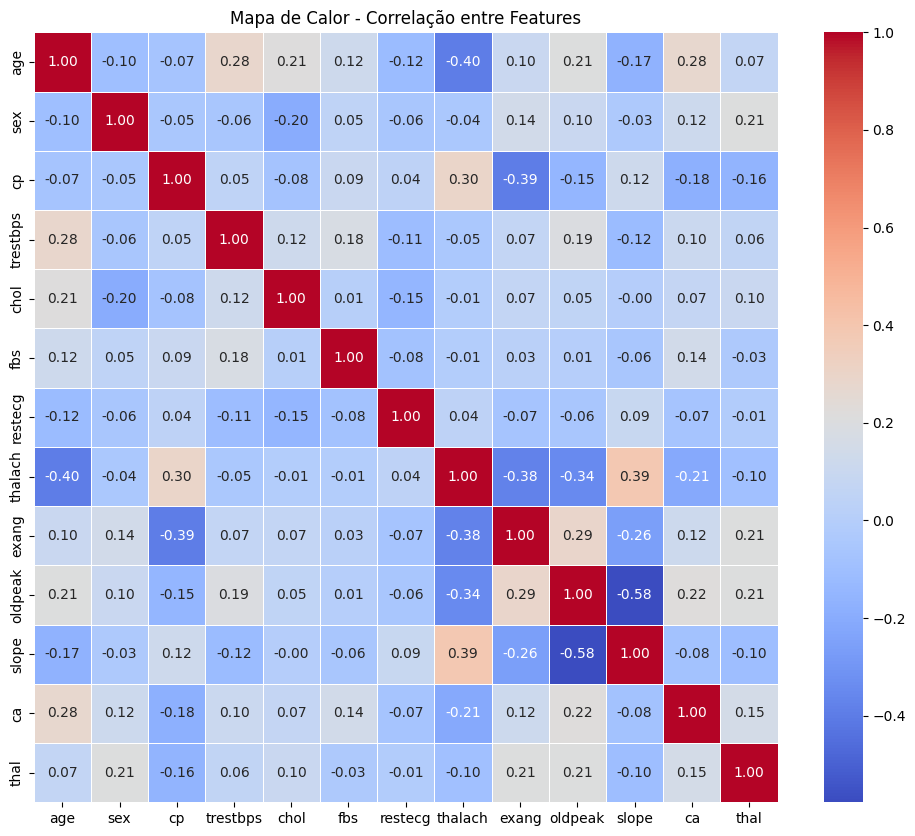

In [39]:
# Dados de Correlação entre as Features
correlation_matrix = X.corr()

# Criando o Mapa de Calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Features')
plt.show()

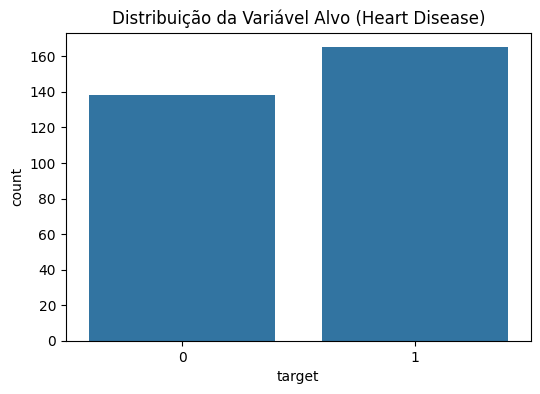

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição da Variável Alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data)
plt.title('Distribuição da Variável Alvo (Heart Disease)')
plt.show()



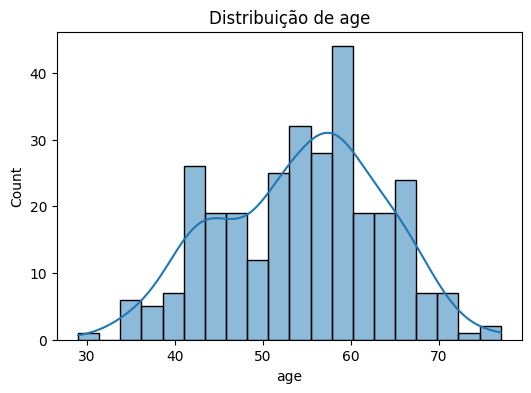

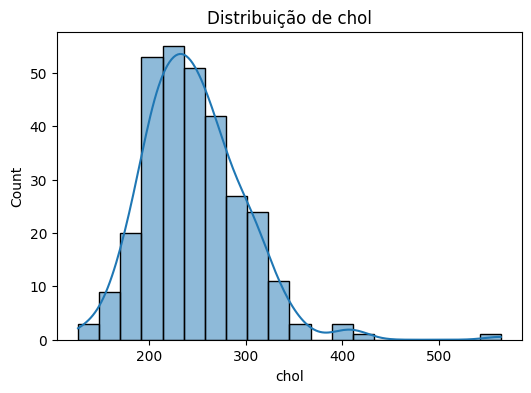

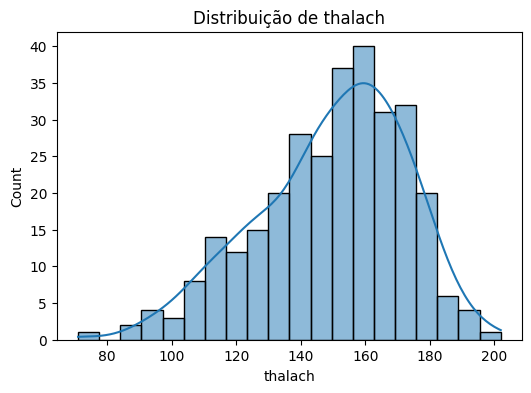

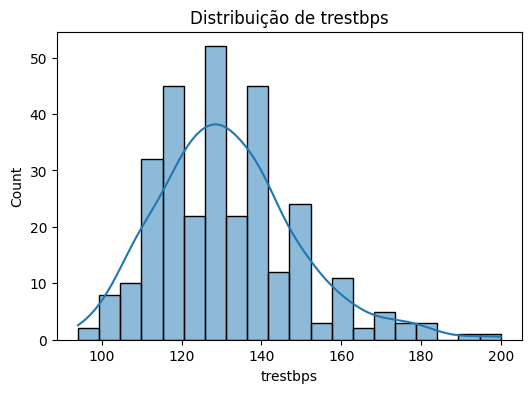

In [42]:
# Histogramas para características selecionadas
selected_features = ['age', 'chol', 'thalach', 'trestbps']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=heart_data, x=feature, kde=True, bins=20)
    plt.title(f'Distribuição de {feature}')
    plt.show()


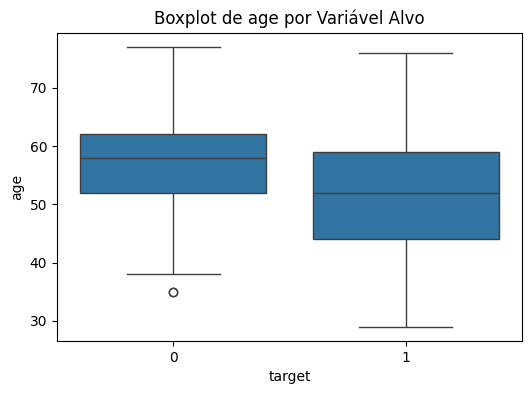

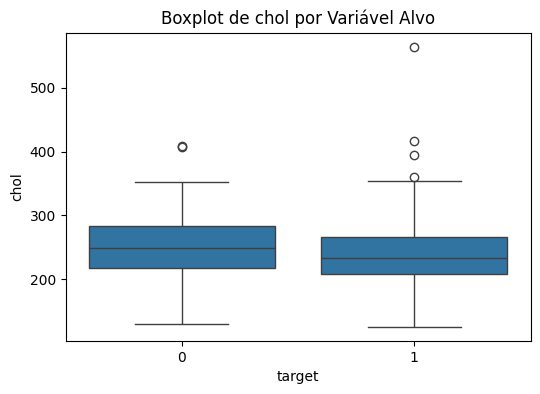

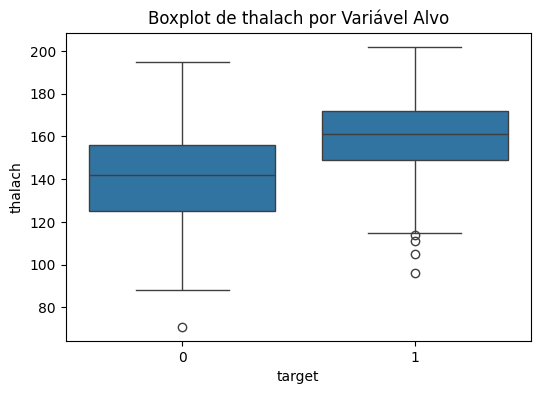

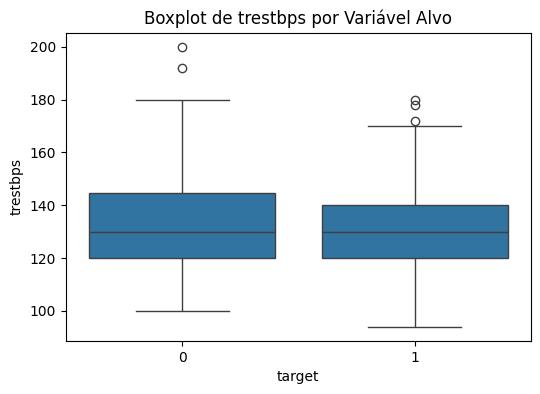

In [44]:
# Boxplots para características selecionadas
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=heart_data)
    plt.title(f'Boxplot de {feature} por Variável Alvo')
    plt.show()

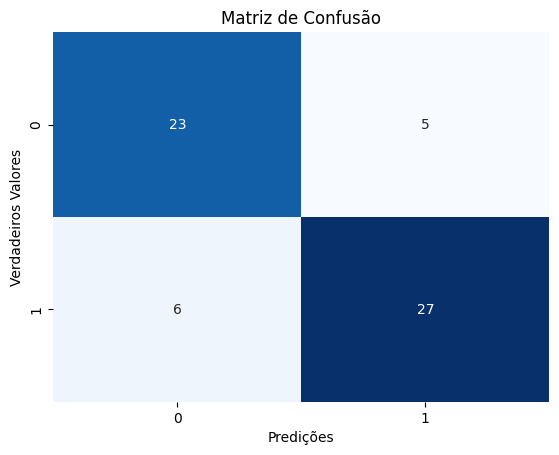

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Verdadeiros Valores')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(Y_test, predictions))
